In [1]:
import pandas as pd

# Load the CSV file
file_path = '/content/online_retail_II 2.csv'
df = pd.read_csv(file_path)


print(df.head())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

      InvoiceDate  Price  Customer ID         Country  
0  12/1/2009 7:45   6.95      13085.0  United Kingdom  
1  12/1/2009 7:45   6.75      13085.0  United Kingdom  
2  12/1/2009 7:45   6.75      13085.0  United Kingdom  
3  12/1/2009 7:45   2.10      13085.0  United Kingdom  
4  12/1/2009 7:45   1.25      13085.0  United Kingdom  


In [2]:
# Remove missing values
df = df.dropna()

# Create a new column 'TotalPrice' to represent the total spent in each transaction
df['TotalPrice'] = df['Quantity'] * df['Price']

# Group by 'CustomerID' and calculate useful features (Total Spend, Frequency, Recency)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

customer_data = df.groupby('Customer ID').agg(
    total_spent=('TotalPrice', 'sum'),
    frequency=('Invoice', 'nunique'),
    recency=('InvoiceDate', 'max')
)

# Calculate recency in terms of days since last purchase
import datetime
customer_data['recency'] = (datetime.datetime.now() - customer_data['recency']).dt.days

# Display the first few rows to check the processed data
print(customer_data.head())


             total_spent  frequency  recency
Customer ID                                 
12346.0           -64.68         15     5290
12347.0          1323.32          2     5226
12348.0           222.16          1     5297
12349.0          2646.99          4     5266
12351.0           300.93          1     5234


<ipython-input-2-763d89dcab2f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['Price']
<ipython-input-2-763d89dcab2f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = customer_data[['total_spent', 'frequency', 'recency']]
y = customer_data['total_spent']  # CLV prediction is based on total spending

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build a simple regression model
def clv_regression_model(input_shape):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
    return model

# Create the model
model = clv_regression_model(X_train.shape[1])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on test data: {mae}')





Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 1822.6940 - mae: 1822.6940 - val_loss: 2131.4395 - val_mae: 2131.4395
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2067.1296 - mae: 2067.1296 - val_loss: 2131.4392 - val_mae: 2131.4392
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2025.8802 - mae: 2025.8802 - val_loss: 2131.4390 - val_mae: 2131.4390
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1801.7812 - mae: 1801.7812 - val_loss: 2131.4390 - val_mae: 2131.4390
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1865.5254 - mae: 1865.5254 - val_loss: 2131.4390 - val_mae: 2131.4390
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1707.9735 - mae: 1707.9735 - val_loss: 2131.4390 - val_mae: 2131.4390
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1957.9363 - mae: 1957.9363 - val_loss: 2131.4390 - val_mae: 2131.4390
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1832.9897 - mae: 1832.9897 - val_

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


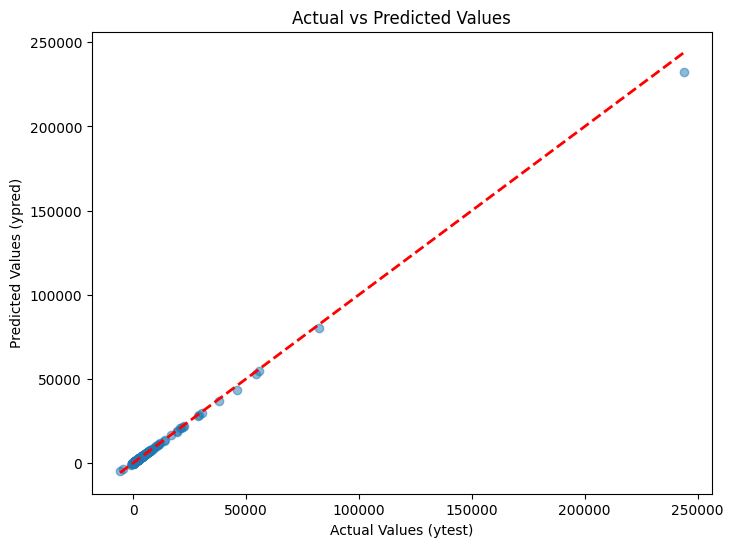

In [11]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)


# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel("Actual Values (ytest)")
plt.ylabel("Predicted Values (ypred)")
plt.title("Actual vs Predicted Values")
plt.show()